## Dataset Reading and Pre-Processing steps

import required libraries

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [2]:
#Code to ignore warnings
import warnings
warnings.filterwarnings("ignore")

**Attribute information:**

1. **target**: DIE (1), LIVE (2)
2. **age**: 10, 20, 30, 40, 50, 60, 70, 80
3. **gender**: male (1), female (2)

           ------ no = 2,   yes = 1 ------

4. **steroid**: no, yes 
5. **antivirals**: no, yes 
6. **fatique**: no, yes 
7. **malaise**: no, yes 
8. **anorexia**: no, yes 
9. **liverBig**: no, yes 
10. **liverFirm**: no, yes 
11. **spleen**: no, yes 
12. **spiders**: no, yes
13. **ascites**: no, yes 
14. **varices**: no, yes
15. **histology**: no, yes


16. **bilirubin**: 0.39, 0.80, 1.20, 2.00, 3.00, 4.00 -- 
17. **alk**: 33, 80, 120, 160, 200, 250 ---
18. **sgot**: 13, 100, 200, 300, 400, 500, ---
19. **albu**: 2.1, 3.0, 3.8, 4.5, 5.0, 6.0, --- 
20. **protime**: 10, 20, 30, 40, 50, 60, 70, 80, 90, --- 

        NA's are represented with "?"

###### 1. Read the HEPATITIS dataset and check the data shapes

In [3]:
## Read "hepatitis.csv" using pandas
# target =  1: Die; 2: Live 
data = pd.read_csv("hepatitis.csv", na_values="?")

In [4]:
data.shape

(155, 21)

In [5]:
data.head()

,ID,target,age,gender,steroid,antivirals,fatigue,malaise,anorexia,liverBig,...,spleen,spiders,ascites,varices,bili,alk,sgot,albu,protime,histology
0,1,2,30,2,1.0,2,2.0,2.0,2.0,1.0,...,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,2,50,1,1.0,2,1.0,2.0,2.0,1.0,...,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,3,2,78,1,2.0,2,1.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,4,2,31,1,NaN,1,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,5,2,34,1,2.0,2,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


###### 2. Check basic summary statistics of the data

In [6]:
data.describe()

,ID,target,age,gender,steroid,antivirals,fatigue,malaise,anorexia,liverBig,...,spleen,spiders,ascites,varices,bili,alk,sgot,albu,protime,histology
count,155.000000,155.000000,155.000000,155.000000,154.000000,155.000000,154.000000,154.000000,154.000000,145.000000,...,150.00000,150.000000,150.000000,150.00000,149.000000,126.000000,151.00000,139.000000,88.000000,155.000000
mean,78.000000,1.793548,41.200000,1.103226,1.506494,1.845161,1.350649,1.603896,1.792208,1.827586,...,1.80000,1.660000,1.866667,1.88000,1.427517,105.325397,85.89404,3.817266,61.852273,1.451613
std,44.888751,0.406070,12.565878,0.305240,0.501589,0.362923,0.478730,0.490682,0.407051,0.379049,...,0.40134,0.475296,0.341073,0.32605,1.212149,51.508109,89.65089,0.651523,22.875244,0.499266
min,1.000000,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.00000,0.300000,26.000000,14.00000,2.100000,0.000000,1.000000
25%,39.500000,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,...,2.00000,1.000000,2.000000,2.00000,0.700000,74.250000,31.50000,3.400000,46.000000,1.000000
50%,78.000000,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,...,2.00000,2.000000,2.000000,2.00000,1.000000,85.000000,58.00000,4.000000,61.000000,1.000000
75%,116.500000,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.00000,2.000000,2.000000,2.00000,1.500000,132.250000,100.50000,4.200000,76.250000,2.000000
max,155.000000,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.00000,2.000000,2.000000,2.00000,8.000000,295.000000,648.00000,6.400000,100.000000,2.000000


###### 3. Check for value counts in target variable

In [7]:
data.target.value_counts()

2    123
1     32
Name: target, dtype: int64

#### 4. Check the datatype of each variable

In [8]:
data.dtypes

ID              int64
target          int64
age             int64
gender          int64
steroid       float64
antivirals      int64
fatigue       float64
malaise       float64
anorexia      float64
liverBig      float64
liverFirm     float64
spleen        float64
spiders       float64
ascites       float64
varices       float64
bili          float64
alk           float64
sgot          float64
albu          float64
protime       float64
histology       int64
dtype: object

#### 5. Drop columns which are not significant

In [9]:
data.drop(["ID"], axis = 1, inplace=True)

In [10]:
data.head()

,target,age,gender,steroid,antivirals,fatigue,malaise,anorexia,liverBig,liverFirm,spleen,spiders,ascites,varices,bili,alk,sgot,albu,protime,histology
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,2,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


#### 6. Identify the Categorical Columns and store them in a variable cat_cols and numerical into num_cols

In [11]:
num_cols = ["age", "bili", "alk", "sgot", "albu", "protime"]
cat_cols = ['gender', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia', 'liverBig', 
            'liverFirm', 'spleen', 'spiders', 'ascites', 'varices', 'histology']

#### 7. Checking the null values

In [12]:
data.isna().sum()

target         0
age            0
gender         0
steroid        1
antivirals     0
fatigue        1
malaise        1
anorexia       1
liverBig      10
liverFirm     11
spleen         5
spiders        5
ascites        5
varices        5
bili           6
alk           29
sgot           4
albu          16
protime       67
histology      0
dtype: int64

In [13]:
data.isnull().sum()

target         0
age            0
gender         0
steroid        1
antivirals     0
fatigue        1
malaise        1
anorexia       1
liverBig      10
liverFirm     11
spleen         5
spiders        5
ascites        5
varices        5
bili           6
alk           29
sgot           4
albu          16
protime       67
histology      0
dtype: int64

#### 8. Split the data into X and y

In [14]:
X = data.drop(["target"], axis = 1)

In [15]:
y = data["target"]

In [16]:
print(X.shape, y.shape)

(155, 19) (155,)


#### 9. Split the data into X_train, X_test, y_train, y_test with test_size = 0.20 using sklearn

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [18]:
## Print the shape of X_train, X_test, y_train, y_test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(124, 19)
(31, 19)
(124,)
(31,)


#### 10. Check null values in train and test, check value_counts in y_train and y_test

In [19]:
# null values in train
X_train.isna().sum()

age            0
gender         0
steroid        1
antivirals     0
fatigue        1
malaise        1
anorexia       1
liverBig       7
liverFirm      8
spleen         4
spiders        4
ascites        4
varices        4
bili           6
alk           23
sgot           4
albu          13
protime       53
histology      0
dtype: int64

In [20]:
# null values in test
X_test.isna().sum()

age            0
gender         0
steroid        0
antivirals     0
fatigue        0
malaise        0
anorexia       0
liverBig       3
liverFirm      3
spleen         1
spiders        1
ascites        1
varices        1
bili           0
alk            6
sgot           0
albu           3
protime       14
histology      0
dtype: int64

In [21]:
print(y_train.value_counts())

2    98
1    26
Name: target, dtype: int64


In [22]:
print(y_test.value_counts())

2    25
1     6
Name: target, dtype: int64


#### 11. Impute the Categorical Columns with mode and Numerical columns with mean

In [23]:
df_cat_train = X_train[cat_cols]
df_cat_test = X_test[cat_cols]

In [24]:
df_cat_train.mode()

,gender,steroid,antivirals,fatigue,malaise,anorexia,liverBig,liverFirm,spleen,spiders,ascites,varices,histology
0,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1


In [25]:
# Impute on train
df_cat_train = df_cat_train.fillna(df_cat_train.mode().iloc[0])

# Impute on test
df_cat_test = df_cat_test.fillna(df_cat_train.mode().iloc[0])

In [26]:
#df_cat.isna().sum()

In [27]:
df_num_train = X_train[num_cols]
df_num_test = X_test[num_cols]

In [28]:
# Impute on train
df_num_train = df_num_train.fillna(df_num_train.mean())

#Impute on test
df_num_test = df_num_test.fillna(df_num_train.mean())

In [29]:
# Combine numeric and categorical in train
X_train = pd.concat([df_num_train, df_cat_train], axis = 1)

# Combine numeric and categorical in test
X_test = pd.concat([df_num_test, df_cat_test], axis = 1)

In [30]:
X_train.isna().sum()

age           0
bili          0
alk           0
sgot          0
albu          0
protime       0
gender        0
steroid       0
antivirals    0
fatigue       0
malaise       0
anorexia      0
liverBig      0
liverFirm     0
spleen        0
spiders       0
ascites       0
varices       0
histology     0
dtype: int64

In [31]:
X_train.isna().sum()

age           0
bili          0
alk           0
sgot          0
albu          0
protime       0
gender        0
steroid       0
antivirals    0
fatigue       0
malaise       0
anorexia      0
liverBig      0
liverFirm     0
spleen        0
spiders       0
ascites       0
varices       0
histology     0
dtype: int64

In [32]:
X_test.isna().sum()

age           0
bili          0
alk           0
sgot          0
albu          0
protime       0
gender        0
steroid       0
antivirals    0
fatigue       0
malaise       0
anorexia      0
liverBig      0
liverFirm     0
spleen        0
spiders       0
ascites       0
varices       0
histology     0
dtype: int64

#### Convert all the categorical columns to Integer Format before dummification (2.0 as 2 etc.)

In [33]:
# Train
X_train[cat_cols] = X_train[cat_cols].astype('int')

# Test
X_test[cat_cols] = X_test[cat_cols].astype('int')

#### 12. Dummify the Categorical columns

In [34]:
## Convert Categorical Columns to Dummies
# Train
X_train = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)

# Test
X_test = pd.get_dummies(X_test, columns=cat_cols, drop_first=True)

In [35]:
## Convert Categorical Columns to Dummies

#train_objs_num = len(X_train)
#dataset = pd.concat(objs=[X_train, X_test], axis=0)

#dataset_preprocessed = pd.get_dummies(dataset, columns=cat_cols,drop_first=True)

#X_train = dataset_preprocessed[:train_objs_num]
#X_test = dataset_preprocessed[train_objs_num:]

In [36]:
X_train.columns

Index(['age', 'bili', 'alk', 'sgot', 'albu', 'protime', 'gender_2',
       'steroid_2', 'antivirals_2', 'fatigue_2', 'malaise_2', 'anorexia_2',
       'liverBig_2', 'liverFirm_2', 'spleen_2', 'spiders_2', 'ascites_2',
       'varices_2', 'histology_2'],
      dtype='object')

In [37]:
X_test.columns

Index(['age', 'bili', 'alk', 'sgot', 'albu', 'protime', 'gender_2',
       'steroid_2', 'antivirals_2', 'fatigue_2', 'malaise_2', 'anorexia_2',
       'liverBig_2', 'liverFirm_2', 'spleen_2', 'spiders_2', 'ascites_2',
       'varices_2', 'histology_2'],
      dtype='object')

#### 13. Scale the numeric attributes ["age", "bili", "alk", "sgot", "albu", "protime"]

In [38]:
#num_cols = ["age", "bili", "alk", "sgot", "albu", "protime"]
scaler = StandardScaler()

scaler.fit(X_train.loc[:,num_cols])

# scale on train
X_train.loc[:,num_cols] = scaler.transform(X_train.loc[:,num_cols])
#X_train[num_cols] = scaler.transform(X_train[num_cols])

# scale on test
X_test.loc[:,num_cols] = scaler.transform(X_test.loc[:,num_cols])

## MODEL BUILDING

    A. SVM
    B. Random Forest
    C. Stacking (With LR, DT, KNN)

### A. SVM

In [39]:
## Build a SVM Classifier
from sklearn.svm import SVC

## Create an SVC object and print it to see the default arguments
svc = SVC()
svc

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [40]:
## Fit
svc.fit(X=X_train, y= y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [41]:
## Predict
train_predictions = svc.predict(X_train)
test_predictions = svc.predict(X_test)

### Train data accuracy
from sklearn.metrics import accuracy_score,f1_score

print("TRAIN Conf Matrix : \n", confusion_matrix(y_train, train_predictions))
print("\nTRAIN DATA ACCURACY",accuracy_score(y_train,train_predictions))
print("\nTrain data f1-score for class '1'",f1_score(y_train,train_predictions,pos_label=1))
print("\nTrain data f1-score for class '2'",f1_score(y_train,train_predictions,pos_label=2))

### Test data accuracy
print("\n\n--------------------------------------\n\n")

print("TEST Conf Matrix : \n", confusion_matrix(y_test, test_predictions))
print("\nTEST DATA ACCURACY",accuracy_score(y_test,test_predictions))
print("\nTest data f1-score for class '1'",f1_score(y_test,test_predictions,pos_label=1))
print("\nTest data f1-score for class '2'",f1_score(y_test,test_predictions,pos_label=2))

TRAIN Conf Matrix : 
 [[15 11]
 [ 1 97]]

TRAIN DATA ACCURACY 0.9032258064516129

Train data f1-score for class '1' 0.7142857142857143

Train data f1-score for class '2' 0.941747572815534


--------------------------------------


TEST Conf Matrix : 
 [[ 5  1]
 [ 0 25]]

TEST DATA ACCURACY 0.967741935483871

Test data f1-score for class '1' 0.9090909090909091

Test data f1-score for class '2' 0.9803921568627451


### SVM with Grid Search for Paramater Tuning

In [42]:
## Use Grid Search for parameter tuning

from sklearn.model_selection import GridSearchCV

svc_grid = SVC()
 

param_grid = { 
                'C': [0.001, 0.01, 0.1, 1, 10, 100 ],
                'gamma': [0, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 
                'kernel':['linear', 'rbf', 'poly' ]
             }

 
svc_cv_grid = GridSearchCV(estimator = svc_grid, param_grid = param_grid, cv = 10) # cv = 3

In [43]:
## Fit the grid search model
%time svc_cv_grid.fit(X=X_train, y=y_train)

Wall time: 6.25 s


GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [44]:
# Get the best parameters
svc_cv_grid.best_params_

{'C': 1, 'gamma': 0, 'kernel': 'linear'}

In [45]:
svc_cv_grid.grid_scores_
#svc_cv_grid.cv_results_

[mean: 0.79032, std: 0.02810, params: {'C': 0.001, 'gamma': 0, 'kernel': 'linear'},
 mean: 0.79032, std: 0.02810, params: {'C': 0.001, 'gamma': 0, 'kernel': 'rbf'},
 mean: 0.79032, std: 0.02810, params: {'C': 0.001, 'gamma': 0, 'kernel': 'poly'},
 mean: 0.79032, std: 0.02810, params: {'C': 0.001, 'gamma': 0.0001, 'kernel': 'linear'},
 mean: 0.79032, std: 0.02810, params: {'C': 0.001, 'gamma': 0.0001, 'kernel': 'rbf'},
 mean: 0.79032, std: 0.02810, params: {'C': 0.001, 'gamma': 0.0001, 'kernel': 'poly'},
 mean: 0.79032, std: 0.02810, params: {'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'},
 mean: 0.79032, std: 0.02810, params: {'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'},
 mean: 0.79032, std: 0.02810, params: {'C': 0.001, 'gamma': 0.001, 'kernel': 'poly'},
 mean: 0.79032, std: 0.02810, params: {'C': 0.001, 'gamma': 0.01, 'kernel': 'linear'},
 mean: 0.79032, std: 0.02810, params: {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'},
 mean: 0.79032, std: 0.02810, params: {'C': 0.001, 'gamma': 0

In [46]:
## Predict
train_predictions = svc_cv_grid.predict(X_train)
test_predictions = svc_cv_grid.predict(X_test)

print("TRAIN DATA ACCURACY",accuracy_score(y_train,train_predictions))
print("\nTrain data f1-score for class '1'",f1_score(y_train,train_predictions,pos_label=1))
print("\nTrain data f1-score for class '2'",f1_score(y_train,train_predictions,pos_label=2))

### Test data accuracy
print("\n\n--------------------------------------\n\n")
print("TEST DATA ACCURACY",accuracy_score(y_test,test_predictions))
print("\nTest data f1-score for class '1'",f1_score(y_test,test_predictions,pos_label=1))
print("\nTest data f1-score for class '2'",f1_score(y_test,test_predictions,pos_label=2))

TRAIN DATA ACCURACY 0.8870967741935484

Train data f1-score for class '1' 0.6956521739130435

Train data f1-score for class '2' 0.9306930693069307


--------------------------------------


TEST DATA ACCURACY 0.9032258064516129

Test data f1-score for class '1' 0.7272727272727272

Test data f1-score for class '2' 0.9411764705882353


## B. Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

In [48]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [49]:
## Predict
train_predictions = rfc.predict(X_train)
test_predictions = rfc.predict(X_test)

print("TRAIN DATA ACCURACY",accuracy_score(y_train,train_predictions))
print("\nTrain data f1-score for class '1'",f1_score(y_train,train_predictions,pos_label=1))
print("\nTrain data f1-score for class '2'",f1_score(y_train,train_predictions,pos_label=2))

### Test data accuracy
print("\n\n--------------------------------------\n\n")
print("TEST DATA ACCURACY",accuracy_score(y_test,test_predictions))
print("\nTest data f1-score for class '1'",f1_score(y_test,test_predictions,pos_label=1))
print("\nTest data f1-score for class '2'",f1_score(y_test,test_predictions,pos_label=2))

TRAIN DATA ACCURACY 0.9919354838709677

Train data f1-score for class '1' 0.9811320754716981

Train data f1-score for class '2' 0.9948717948717948


--------------------------------------


TEST DATA ACCURACY 0.8709677419354839

Test data f1-score for class '1' 0.6666666666666666

Test data f1-score for class '2' 0.92


### Important Features for Random Forest basic Model

In [50]:
rfc.feature_importances_

array([0.05944334, 0.16508148, 0.11063411, 0.09535815, 0.17747967,
       0.10802137, 0.02703025, 0.01786906, 0.00631947, 0.00748021,
       0.01267588, 0.00981677, 0.00877784, 0.01643905, 0.03626211,
       0.03693186, 0.0247138 , 0.04429194, 0.03537366])

In [51]:
## Get important Features
feat_importances = pd.Series(rfc.feature_importances_, index = X_train.columns)
feat_importances.plot(kind='bar')

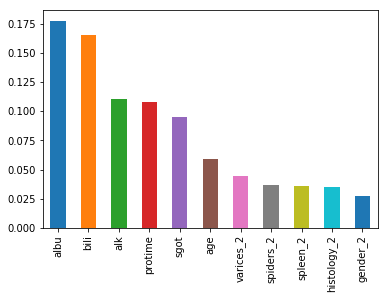

In [52]:
feat_importances_ordered = feat_importances.nlargest(11)
feat_importances_ordered.plot(kind='bar')

## Random Forest Tuning with RandomizedSearchCV

In [53]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer

## n_jobs = -1 uses all cores of processor
## max_features is the maximum number of attributes to select for each tree
rfc_grid = RandomForestClassifier(n_jobs=-1, max_features='sqrt', class_weight='balanced_subsample')
 
# Use a grid over parameters of interest
## n_estimators is the number of trees in the forest
## max_depth is how deep each tree can be
## min_sample_leaf is the minimum samples required in each leaf node for the root node to split
## "A node will only be split if in each of it's leaf nodes there should be min_sample_leaf"

param_grid = {"n_estimators" : [10, 25, 50, 75, 100],
           "max_depth" : [10, 12, 14, 16, 18, 20],
           "min_samples_leaf" : [5, 10, 15, 20],
           "class_weight" : ['balanced','balanced_subsample']}
 
rfc_cv_grid = RandomizedSearchCV(estimator = rfc_grid, 
                                 param_distributions = param_grid, 
                                 cv = 3, n_iter=10)

In [54]:
rfc_cv_grid.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=None, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': [10, 25, 50, 75, 100], 'max_depth': [10, 12, 14, 16, 18, 20], 'min_samples_leaf': [5, 10, 15, 20], 'class_weight': ['balanced', 'balanced_subsample']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [55]:
rfc_cv_grid.best_params_
#rfc_cv_grid.best_estimator_

{'n_estimators': 100,
 'min_samples_leaf': 5,
 'max_depth': 18,
 'class_weight': 'balanced'}

In [56]:
## Predict
train_predictions = rfc_cv_grid.predict(X_train)
test_predictions = rfc_cv_grid.predict(X_test)

print("TRAIN DATA ACCURACY",accuracy_score(y_train,train_predictions))
print("\nTrain data f1-score for class '1'",f1_score(y_train,train_predictions,pos_label=1))
print("\nTrain data f1-score for class '2'",f1_score(y_train,train_predictions,pos_label=2))

### Test data accuracy
print("\n\n--------------------------------------\n\n")
print("TEST DATA ACCURACY",accuracy_score(y_test,test_predictions))
print("\nTest data f1-score for class '1'",f1_score(y_test,test_predictions,pos_label=1))
print("\nTest data f1-score for class '2'",f1_score(y_test,test_predictions,pos_label=2))

TRAIN DATA ACCURACY 0.9032258064516129

Train data f1-score for class '1' 0.8000000000000002

Train data f1-score for class '2' 0.9361702127659575


--------------------------------------


TEST DATA ACCURACY 0.8387096774193549

Test data f1-score for class '1' 0.6666666666666667

Test data f1-score for class '2' 0.8936170212765958


### Important Features for Random Forest CV Grid Search

In [57]:
rfc_cv_grid.best_estimator_.feature_importances_

array([0.04289316, 0.17924662, 0.06344202, 0.04365011, 0.17911514,
       0.10133768, 0.00308336, 0.01419491, 0.00184689, 0.03926061,
       0.03966661, 0.01130008, 0.00543337, 0.01424657, 0.01093589,
       0.12610929, 0.02788847, 0.00584129, 0.09050792])

In [58]:
## Get important Features
feat_importances = pd.Series(rfc_cv_grid.best_estimator_.feature_importances_, index = X_train.columns)

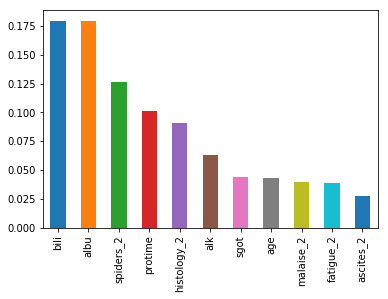

In [59]:
feat_importances_ordered = feat_importances.nlargest(11)
feat_importances_ordered.plot(kind='bar')

## C. Stacking Model

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [61]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train,y_train)

y_pred_train_dtc = dtc.predict(X_train)
y_pred_test_dtc = dtc.predict(X_test)

In [62]:
lrc = LogisticRegression()

lrc.fit(X_train,y_train)

y_pred_train_lrc = lrc.predict(X_train)
y_pred_test_lrc = lrc.predict(X_test)

In [63]:
knn = KNeighborsClassifier(n_neighbors=5)  

knn.fit(X_train, y_train)

y_pred_train_knn = knn.predict(X_train)
y_pred_test_knn = knn.predict(X_test)

Let us take mode of the above predictions

In [64]:
from scipy.stats import mode

In [65]:
stack_train = pd.DataFrame([y_pred_train_dtc,y_pred_train_lrc,y_pred_train_knn])
stack_test = pd.DataFrame([y_pred_test_dtc,y_pred_test_lrc,y_pred_test_knn])
#stacked_pred_train = mode(stack_train,axis=1)[0]

In [66]:
stack_train = stack_train.T
stack_test = stack_test.T

In [67]:
stack_train.columns = ['y_pred_train_dtc','y_pred_train_lrc','y_pred_train_knn']
stack_train.columns = ['y_pred_test_dtc','y_pred_test_lrc','y_pred_test_knn']

In [68]:
print(stack_train.shape)
print(stack_test.shape)

(124, 3)
(31, 3)


In [69]:
dtc = DecisionTreeClassifier()

dtc.fit(stack_train,y_train)

stacked_pred_train = dtc.predict(stack_train)
stacked_pred_test = dtc.predict(stack_test)

In [70]:
print("TRAIN DATA ACCURACY",accuracy_score(y_train,stacked_pred_train))
print("\nTrain data f1-score for class '1'",f1_score(y_train,stacked_pred_train,pos_label=1))
print("\nTrain data f1-score for class '2'",f1_score(y_train,stacked_pred_train,pos_label=2))

### Test data accuracy
print("\n\n--------------------------------------\n\n")
print("TEST DATA ACCURACY",accuracy_score(y_test,stacked_pred_test))
print("\nTest data f1-score for class '1'",f1_score(y_test,stacked_pred_test,pos_label=1))
print("\nTest data f1-score for class '2'",f1_score(y_test,stacked_pred_test,pos_label=2))

TRAIN DATA ACCURACY 1.0

Train data f1-score for class '1' 1.0

Train data f1-score for class '2' 1.0


--------------------------------------


TEST DATA ACCURACY 0.6451612903225806

Test data f1-score for class '1' 0.26666666666666666

Test data f1-score for class '2' 0.7659574468085107
